In [2]:
import pandas as pd

# Read the CSV file, skipping the first 4 rows (metadata)
file_path = 'API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv'
df = pd.read_csv(file_path, encoding='utf-8', skiprows=4)

# Display the DataFrame
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,984846.0,1011421.0,1036950.0,1062737.0,1090270.0,1120168.0,...,1777568.0,1791019.0,1797086.0,1788891.0,1790151.0,1786079.0,1768096.0,1682668.0,1527324.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5532301.0,5655232.0,5782221.0,5911135.0,6048006.0,6195593.0,...,32109010.0,33090921.0,34085182.0,35111408.0,36134863.0,37140230.0,38222876.0,39390799.0,40583164.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16440172.0,16908035.0,17418522.0,17954564.0,18511361.0,19089380.0,...,57259551.0,57635162.0,58613001.0,59587885.0,60562381.0,61502603.0,62378410.0,63212384.0,64007187.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3153729.0,3254086.0,3358099.0,3465907.0,3577017.0,3692086.0,...,16914423.0,17441320.0,17973569.0,18513839.0,19059395.0,19603607.0,20152938.0,20723965.0,21314956.0,NaN


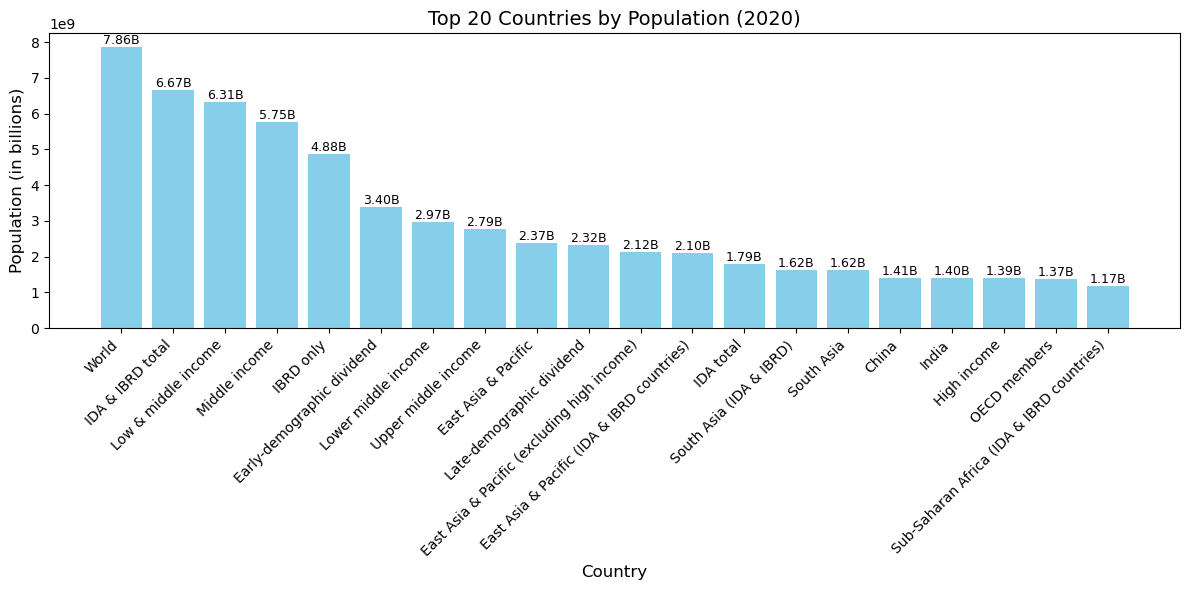

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file, skipping metadata rows
file_path = 'API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv'
df = pd.read_csv(file_path, encoding='utf-8', skiprows=4)

# Select and clean population data for 2020
if '2020' in df.columns:
    population_2020 = df[['Country Name', '2020']].dropna()  # Drop missing values
    top_20 = population_2020.sort_values('2020', ascending=False).head(20)  # Top 20 countries
    
    # Create a bar chart
    plt.figure(figsize=(12, 6))
    bars = plt.bar(top_20['Country Name'], top_20['2020'], color='skyblue')
    
    # Customize the chart
    plt.title('Top 20 Countries by Population (2020)', fontsize=14)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Population (in billions)', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
    
    # Add population labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, 
                 f'{height/1e9:.2f}B',  # Format in billions
                 ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
else:
    print("Column '2020' not found. Available columns:", df.columns.tolist())

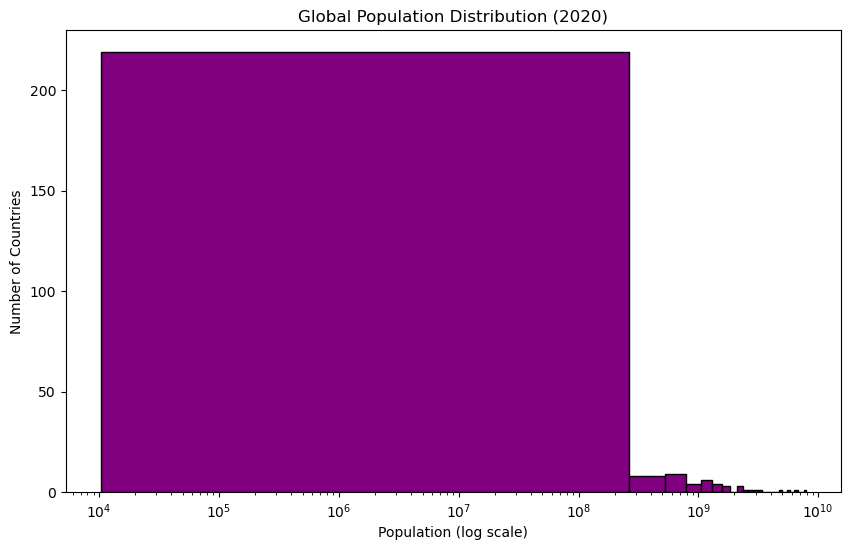

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['2020'].dropna(), bins=30, color='purple', edgecolor='black')
plt.title('Global Population Distribution (2020)')
plt.xlabel('Population (log scale)')
plt.ylabel('Number of Countries')
plt.xscale('log')  # Use log scale for skewed data
plt.show()

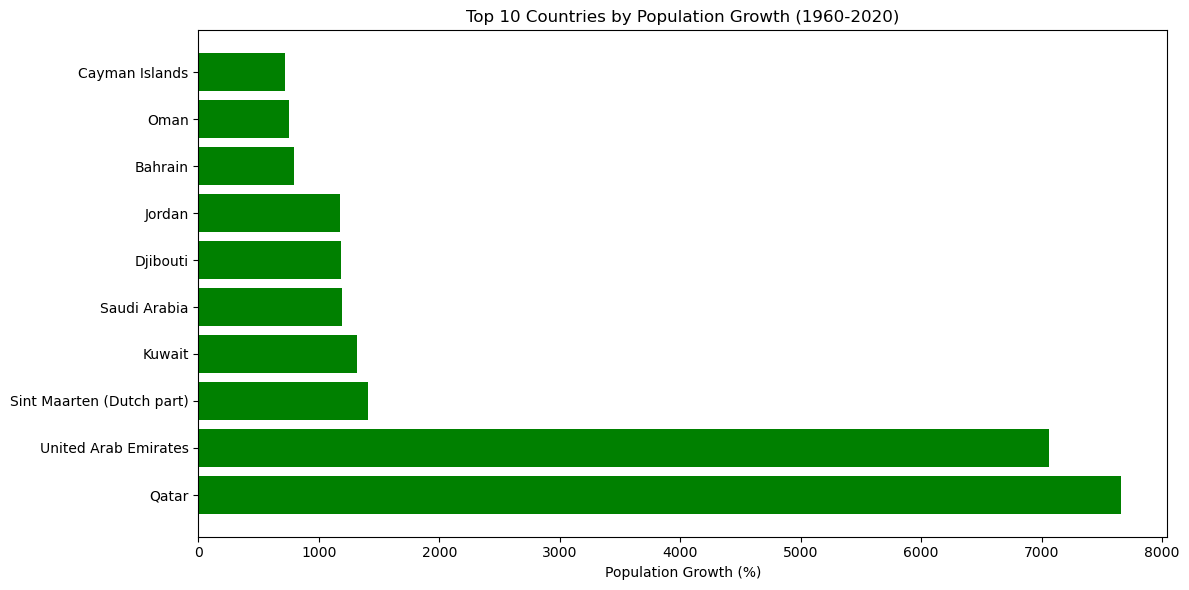

In [6]:
df['Growth'] = (df['2020'] - df['1960']) / df['1960'] * 100  # % change
top_growth = df.sort_values('Growth', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_growth['Country Name'], top_growth['Growth'], color='green')
plt.title('Top 10 Countries by Population Growth (1960-2020)')
plt.xlabel('Population Growth (%)')
plt.tight_layout()
plt.show()